In [79]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [80]:
iterations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
              16, 17, 18]

datasets = ['Shuttle', 'Covertype', 'KDD', 'Darknet']

metrics = {
    "F2": {
        "Shuttle": [0.9694, 0.9297, 0.3524, 0.9515, 0.1906, 0.8431, 0.7198, 0.8607, 0.6816, 0.8388, 0.6441, 0.8192, 0.8272, 0.8804, 0.7872,
                    0.9050, 0.7661, 0.8808],
        "Covertype": [0.4718, 0.4814, 0.2802, 0.5184, 0.2714, 0.3959, 0.2765, 0.2257, 0.1552, 0.1663, 0.1889, 0.1712, 0.1032, 0.4736, 0.1765,
                      0.4381, 0.2072, 0.4232],
        "KDD": [0.9573, 0.9539, 0.9443, 0.9512, 0.7167, 0.9501, 0.0095, 0.0096, 0.0141, 0.1025, 0.0039, 0.0525, 0.0468, 0.9462, 0.2971,
                0.9489, 0.0046, 0.9533],
        "Darknet": [0.8501, 0.8460, 0.5732, 0.8755, 0.3119, 0.8603, 0.0934, 0.1418, 0.3376, 0.2725, 0.4155, 0.4152, 0.1885, 0.8315, 0.2726,
                    0.8376, 0.1696, 0.8454],
    },
    "MCC": {
        "Shuttle": [0.9170, 0.7963, 0.1331, 0.8673, 0.0381, 0.4495, 0.6710, 0.7208, 0.4884, 0.7159, 0.4562, 0.5858, 0.6684, 0.6456, 0.5462,
                    0.7147, 0.4689, 0.6082],
        "Covertype": [0.1506, 0.1630, 0.0009, 0.2114, 0.0048, 0.0602, 0.1305, 0.0631, 0.0575, 0.0576, 0.0522, 0.0647, 0.0555, 0.1437, 0.0597,
                      0.1028, 0.0691, 0.0918],
        "KDD": [0.3463, 0.2695, 0.0167, 0.1373, -0.0178, 0.1473, 0.0863, 0.0175, 0.0822, 0.0720, 0.0429, 0.0257, 0.0676, 0.0036, 0.0609,
                0.1051, 0.0574, 0.2811],
        "Darknet": [0.2384, 0.2680, 0.0998, 0.4421, 0.0449, 0.2846, 0.1287, 0.1450, 0.2375, 0.1380, 0.2156, 0.2286, 0.1234, 0.1260, 0.1701,
                    0.1888, 0.0905, 0.2271],
    },
    "Macro Average Precision": {
        "Shuttle": [0.5686, 0.4900, 0.2257, 0.5147, 0.0678, 0.3845, 0.5578, 0.5977, 0.4777, 0.6000, 0.4095, 0.4632, 0.4903, 0.4017, 0.4456,
                    0.3935, 0.4567, 0.4493],
        "Covertype": [0.2434, 0.2649, 0.1300, 0.2899, 0.0878, 0.1538, 0.2117, 0.1913, 0.2027, 0.1589, 0.1881, 0.2046, 0.2091, 0.2132, 0.2144,
                      0.1915, 0.1768, 0.2582],
        "KDD": [0.1046, 0.1176, 0.0461, 0.0616, 0.0363, 0.0836, 0.0498, 0.0260, 0.0616, 0.0824, 0.0654, 0.0533, 0.0479, 0.0479, 0.0608,
                0.0622, 0.0571, 0.0811],
        "Darknet": [0.2611, 0.1839, 0.1158, 0.3138, 0.0626, 0.2487, 0.1722, 0.2162, 0.2764, 0.1591, 0.2217, 0.2035, 0.1934, 0.1971, 0.1888,
                    0.1635, 0.1539, 0.1830],
    },
    "Weighted Average Precision": {
        "Shuttle": [0.9690, 0.9242, 0.4671, 0.9524, 0.2820, 0.8000, 0.9400, 0.9509, 0.8802, 0.9504, 0.8738, 0.8995, 0.9451, 0.8742, 0.9056,
                    0.8948, 0.8410, 0.8605],
        "Covertype": [0.4771, 0.4395, 0.2873, 0.4554, 0.2482, 0.3496, 0.4562, 0.3993, 0.5017, 0.3399, 0.3572, 0.3394, 0.4852, 0.4186, 0.4768,
                      0.4016, 0.3520, 0.4658],
        "KDD": [0.9364, 0.9344, 0.9127, 0.9219, 0.7273, 0.9235, 0.3870, 0.3836, 0.3692, 0.5775, 0.1972, 0.3825, 0.3808, 0.9127, 0.6992,
                0.9177, 0.5326, 0.9274],
        "Darknet": [0.7818, 0.7833, 0.5972, 0.8364, 0.4574, 0.7902, 0.5423, 0.5453, 0.7321, 0.6696, 0.8697, 0.8635, 0.8568, 0.7582, 0.7931,
                    0.7613, 0.8366, 0.7725],
    },
    "Macro Average Recall (Balanced Accuracy)": {
        "Shuttle": [0.5501, 0.4227, 0.2220, 0.4601, 0.1432, 0.3525, 0.7252, 0.8396, 0.7446, 0.8140, 0.5935, 0.7009, 0.6652, 0.3368, 0.5599,
                    0.3671, 0.5565, 0.4037],
        "Covertype": [0.1912, 0.2042, 0.1358, 0.2265, 0.1491, 0.1563, 0.3385, 0.2216, 0.2458, 0.2315, 0.2307, 0.2158, 0.2213, 0.1895, 0.2360,
                      0.1674, 0.2166, 0.1548],
        "KDD": [0.0848, 0.0736, 0.0515, 0.0648, 0.0452, 0.0605, 0.1453, 0.0853, 0.1421, 0.1965, 0.1323, 0.1026, 0.1268, 0.0476, 0.1094,
                0.0608, 0.1161, 0.0751],
        "Darknet": [0.2476, 0.1725, 0.1292, 0.2582, 0.1119, 0.2377, 0.2912, 0.4276, 0.4894, 0.3864, 0.4628, 0.3623, 0.3736, 0.1407, 0.3530,
                    0.1586, 0.3161, 0.1661],
    },
    "Weighted Average Recall (Accuracy)": {
        "Shuttle": [0.9699, 0.9338, 0.3784, 0.9538, 0.2246, 0.8649, 0.7138, 0.8465, 0.6738, 0.8232, 0.6296, 0.8130, 0.8111, 0.8919, 0.7789,
                    0.9126, 0.7597, 0.8944],
        "Covertype": [0.5338, 0.5393, 0.3213, 0.5685, 0.2986, 0.4712, 0.2804, 0.2438, 0.1488, 0.1715, 0.2052, 0.1997, 0.1248, 0.5339, 0.1935,
                      0.5083, 0.2353, 0.5001],
        "KDD": [0.9640, 0.9609, 0.9527, 0.9590, 0.7148, 0.9581, 0.0132, 0.0131, 0.0171, 0.0948, 0.0091, 0.0485, 0.0442, 0.9551, 0.2883,
                0.9571, 0.0121, 0.9604],
        "Darknet": [0.8731, 0.8656, 0.5815, 0.8910, 0.3153, 0.8814, 0.0954, 0.1461, 0.3314, 0.2827, 0.3933, 0.4096, 0.1870, 0.8572, 0.2712,
                    0.8615, 0.1707, 0.8676],
    },
    "Macro Average F1 Score": {
        "Shuttle": [0.5289, 0.4400, 0.1610, 0.4701, 0.0508, 0.3545, 0.5394, 0.6287, 0.4918, 0.6123, 0.4014, 0.4773, 0.4857, 0.3477, 0.4158,
                    0.3732, 0.4315, 0.4105],
        "Covertype": [0.1617, 0.1770, 0.0804, 0.2038, 0.0908, 0.1146, 0.1786, 0.1238, 0.1069, 0.1063, 0.1177, 0.1201, 0.0779, 0.1596, 0.1054,
                      0.1334, 0.1045, 0.1185],
        "KDD": [0.0851, 0.0763, 0.0475, 0.0623, 0.0359, 0.0625, 0.0358, 0.0063, 0.0388, 0.0689, 0.0371, 0.0308, 0.0273, 0.0465, 0.0337,
                0.0602, 0.0314, 0.0735],
        "Darknet": [0.2354, 0.1720, 0.1001, 0.2638, 0.0487, 0.2350, 0.1034, 0.1790, 0.2447, 0.1255, 0.1980, 0.1795, 0.1215, 0.1405, 0.1331,
                    0.1535, 0.0742, 0.1658],
    },
    "Weighted Average F1 Score": {
        "Shuttle": [0.9688, 0.9251, 0.3385, 0.9494, 0.1745, 0.8165, 0.7422, 0.8880, 0.7182, 0.8702, 0.6803, 0.8346, 0.8607, 0.8665, 0.8094,
                    0.8963, 0.7861, 0.8645],
        "Covertype": [0.4129, 0.4272, 0.2462, 0.4695, 0.2524, 0.3286, 0.3022, 0.2269, 0.1928, 0.1899, 0.1967, 0.1641, 0.1125, 0.4170, 0.1855,
                      0.3715, 0.2042, 0.3523],
        "KDD": [0.9476, 0.9437, 0.9322, 0.9399, 0.7201, 0.9384, 0.0100, 0.0129, 0.0166, 0.1369, 0.0040, 0.0718, 0.0636, 0.9331, 0.3278,
                0.9368, 0.0038, 0.9429],
        "Darknet": [0.8186, 0.8195, 0.5745, 0.8550, 0.3337, 0.8314, 0.1239, 0.1685, 0.3877, 0.2912, 0.5002, 0.4838, 0.2362, 0.7965, 0.3149,
                    0.8048, 0.2209, 0.8148],
    }
}

In [81]:
# Comparison baseline values for XGBoost and eLCS
comparison_values = {
    "F2": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8692, "KDD": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.8163, "Covertype": 0.6722, "KDD": 0.9888, "Darknet": 0.9451},
    },
    "MCC": {
        "XGBoost": {"Shuttle": 0.9993, "Covertype": 0.7895, "KDD": 0.9980, "Darknet": 0.9991},
        "eLCS": {"Shuttle": 0.5102, "Covertype": 0.4706, "KDD": 0.8760, "Darknet": 0.8045},
    },
    "Macro Average Precision": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8839, "KDD": 0.8090, "Darknet": 0.9948},
        "eLCS": {"Shuttle": 0.2885, "Covertype": 0.4571, "KDD": 0.2967, "Darknet": 0.6752},
    },
    "Weighted Average Precision": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8697, "KDD": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.7433, "Covertype": 0.6652, "KDD": 0.9864, "Darknet": 0.9440},
    },
    "Macro Average Recall (Balanced Accuracy)": {
        "XGBoost": {"Shuttle": 0.9243, "Covertype": 0.8319, "KDD": 0.7351, "Darknet": 0.9890},
        "eLCS": {"Shuttle": 0.2866, "Covertype": 0.3532, "KDD": 0.2182, "Darknet": 0.4195},
    },
    "Weighted Average Recall (Accuracy)": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8696, "KDD": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.8451, "Covertype": 0.6833, "KDD": 0.9898, "Darknet": 0.9500},
    },
    "Macro Average F1 Score": {
        "XGBoost": {"Shuttle": 0.9501, "Covertype": 0.8539, "KDD": 0.7628, "Darknet": 0.9918},
        "eLCS": {"Shuttle": 0.2768, "Covertype": 0.3594, "KDD": 0.2357, "Darknet": 0.4494},
    },
    "Weighted Average F1 Score": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8690, "KDD": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.7780, "Covertype": 0.6600, "KDD": 0.9875, "Darknet": 0.9390},
    }
}

In [82]:
# Define colors for datasets
dataset_colors = {
    "Shuttle": "b",
    "Covertype": "g",
    "KDD": "r",
    "Darknet": "gray",
}

# Helper function to adjust brightness of a color
def adjust_brightness(color, factor):
    rgb = mcolors.to_rgb(color)
    return tuple(min(max(c * factor, 0), 1) for c in rgb)

In [83]:
#selected_iterations = iterations

selected_iterations = [1, 4, 11, 14, 16, 18]

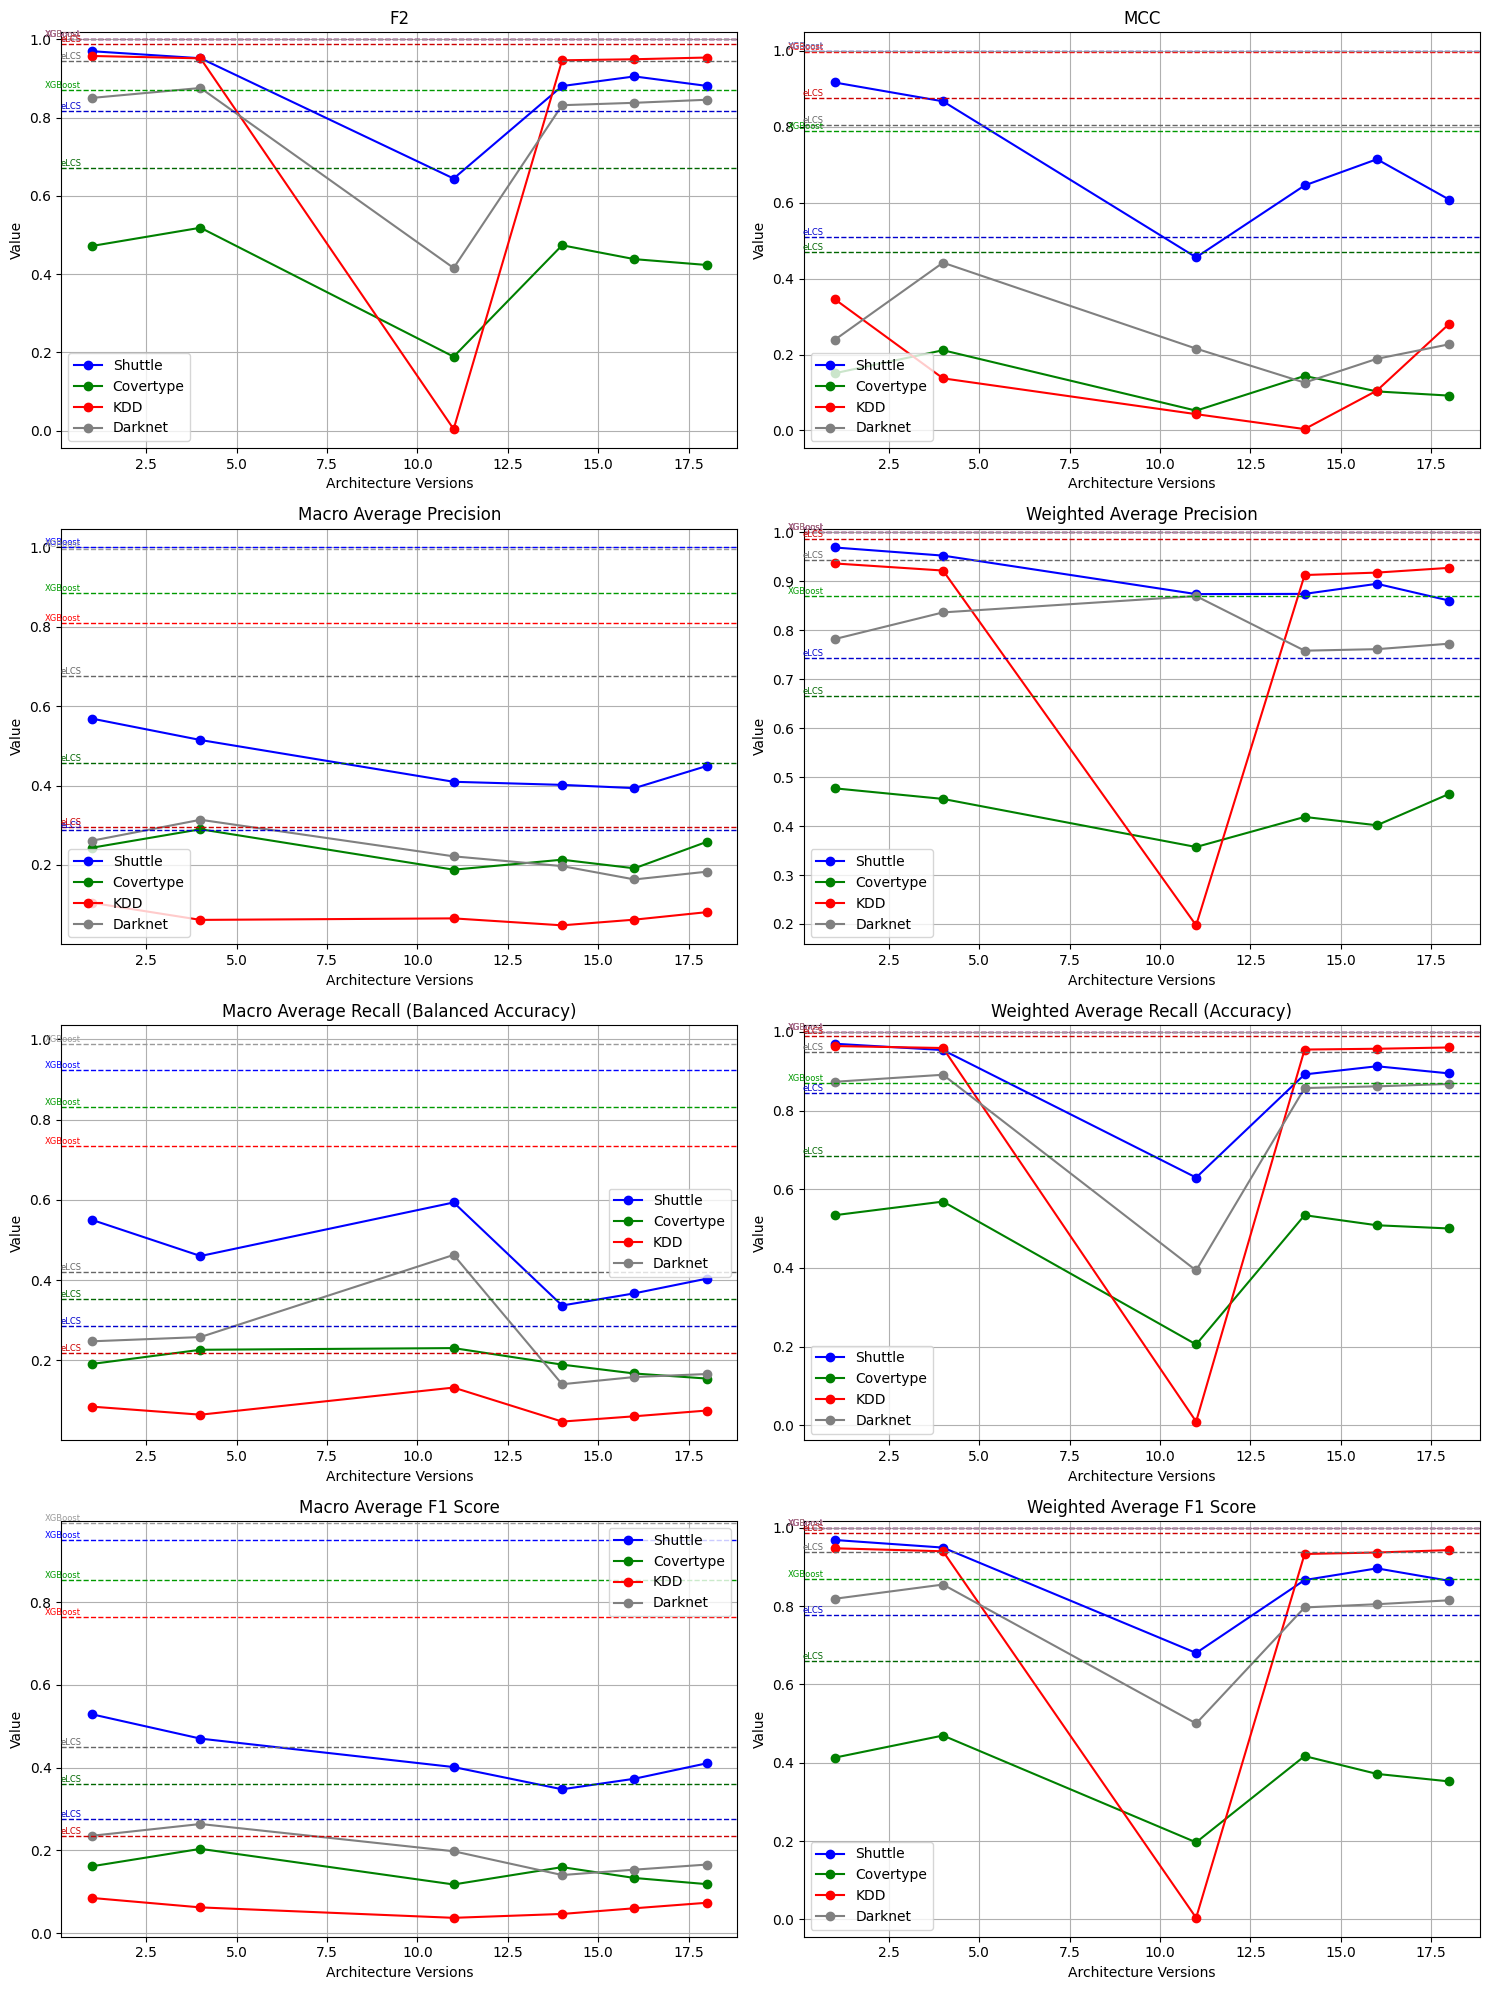

In [84]:
# List of metrics to plot
metric_names = [
    #"ROC-AUC", "PR-AUC",
    "F2", "MCC", 
    "Macro Average Precision", "Weighted Average Precision", 
    "Macro Average Recall (Balanced Accuracy)", "Weighted Average Recall (Accuracy)", 
    "Macro Average F1 Score", "Weighted Average F1 Score"
]

# Set up the figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate through the metrics and plot each one
for i, metric in enumerate(metric_names):
    if metric in metrics:
        ax = axes[i]
        for dataset in datasets:
            # Plot the dataset's line
            iters_on_plot = np.intersect1d(iterations, selected_iterations)
            metric_on_plot = [metrics[metric][dataset][i-1] for i in selected_iterations]
            ax.plot(iters_on_plot, metric_on_plot, label=dataset, marker='o', color=dataset_colors[dataset])
        
    # Add horizontal dashed lines for XGBoost and eLCS
    if metric in comparison_values:
        xgboost_values = comparison_values[metric].get("XGBoost", {})
        elcs_values = comparison_values[metric].get("eLCS", {})
            
        for dataset in datasets:
            # Dashed line for XGBoost
            if dataset in xgboost_values:
                xgboost_value = xgboost_values[dataset]
                dashed_color = adjust_brightness(dataset_colors[dataset], 1.2)  # Slightly brighter
                ax.axhline(y=xgboost_value, color=dashed_color, linestyle='--', linewidth=1)
                ax.text(selected_iterations[0] - 0.3, xgboost_value, 'XGBoost', 
                        color=dashed_color, fontsize=6, va='bottom', ha='right')

            # Dashed line for eLCS
            if dataset in elcs_values:
                elcs_value = elcs_values[dataset]
                dashed_color = adjust_brightness(dataset_colors[dataset], 0.8)  # Slightly darker
                ax.axhline(y=elcs_value, color=dashed_color, linestyle='--', linewidth=1)
                ax.text(selected_iterations[0] - 0.3, elcs_value, 'eLCS', 
                        color=dashed_color, fontsize=6, va='bottom', ha='right')

        ax.set_title(metric)
        ax.set_xlabel('Architecture Versions')
        ax.set_ylabel('Value')
        ax.legend()
        ax.grid(True)
    else:
        # If no data for a metric, skip its subplot
        axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()